### Uni-Dimensional illustrations for  the Kraichnan Model

#### Sources:
Kraichnan, PRL 1994, https://journals.aps.org/prl/abstract/10.1103/PhysRevLett.72.1016

Frisch-al, PRL, 1998 https://arxiv.org/pdf/cond-mat/9802192.pdf 

Falkovich et al, 2001, https://arxiv.org/pdf/cond-mat/0105199.pdf

Eyink and Frisch, 2010, 'Voyage through Turbulence'', Chapter 10, Section IV.C, https://arxiv.org/pdf/1011.2383.pdf




In [1]:
%matplotlib inline
font = {'family':'serif','size':25}
rc('font',**font)
rc('text', usetex=True)
rc('xtick',labelsize='larger')
rc('ytick',labelsize='larger')
figheight=9

In [16]:
%%html
<table><tr>
            <td><img src='./DATA_Kraichnan/Kraichnan_Pic.jpg' style=" width: 70%;transform:rotate(0deg);" ></td>
 </tr></table>

""


### 1 ) Velocity profile
The velocity profile is described in terms of a Gaussian centered homogeneous stochastic process $(v(x),x\in \mathbb R)$, hence specified by its correlation function.

$$ <v(x)v(y)> = C(x-y) := V_0^2 e^{-||x-y||_\epsilon^\xi/L^\xi} $$

$\xi  \in [0,2]$ :  roughness

$L$ : Large-scale (to ensure finite total energy)

$V_0$ : root-mean-square  velocity 

$ ||r ||_\epsilon $: regularized norm, for example  $||r ||_\epsilon : = (r^2 + \epsilon^2)^{1/2}$ 



In [2]:
# Gaussian choleski on 2pi x space
def Generate_Gaussian_Process(N=256,M=100,xlim=np.array([0,2*pi]), c=lambda t : lambda s: 0.5*(s+t-np.abs(s-t)),cholesky=True):
            #N : resolution
            #M : Number of realization
            #c: correlation function

            ## First build the correlation matrix gamma
            x=xlim[0]+(xlim[1]-xlim[0])*np.arange(N)/N
            xy=np.meshgrid(x,x)
            gamma=c(xy[0])(xy[1])
#            print(gamma)
            ## Compute its cholesky decomposition gamma= LL^T
            if cholesky: 
                L=np.linalg.cholesky(gamma)
            else:
            ## Method 2, that also handles non-definite matrices (Gamma= LL^T but L is not necessarily lower diagonal)
                v,a=np.linalg.eigh(gamma, UPLO='L')
                L=a@np.sqrt(np.abs(np.diag(v)))

            ## Finally compute M realizations of the process
            X=np.zeros((N,M))
            for i in range(M):
                Delta=np.random.randn(N)
                tmp=L@Delta
                X[:,i]=tmp[:].flatten()
            return X,x

In [3]:
def Norm(x,epsilon=0):
    return (x**2 +epsilon**2)**0.5

#def Norm(x,epsilon=0):
#    if epsilon<=0 : return np.abs(x)
#    else:
#        return (0.5*x**2/epsilon +epsilon*0.5)*(np.abs(x)<=epsilon)+np.abs(x)*(np.abs(x)>epsilon)

def Corr_FBM(xi=0.5,epsilon=0,L=1):    
    return lambda x : lambda y: 0.5*((Norm(x,epsilon)/L)**xi+(Norm(y,epsilon)/L)**xi-(Norm((y-x),epsilon)/L)**xi)

def Corr_Kraichnan(xi=1,epsilon=0,L=1):    
    return lambda x : lambda y: np.exp(-(Norm((y-x),epsilon)/L)**xi)


##### Example 
##### Realizations of  velocity profiles with $\xi =2/3$ with and without regularization 

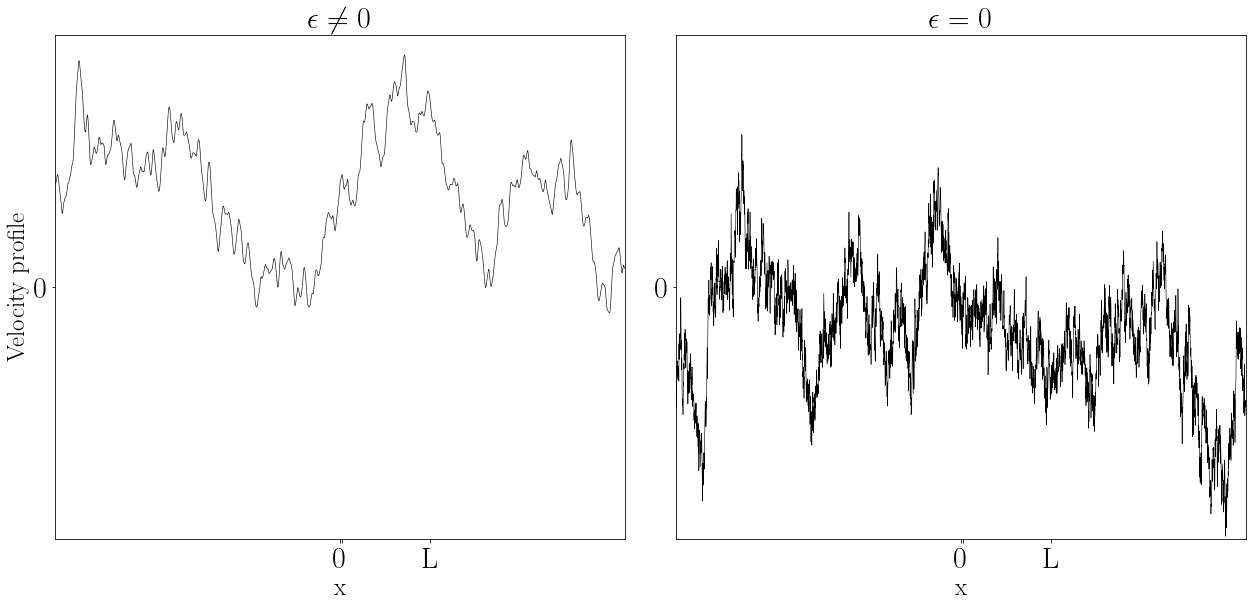

In [4]:
N=4096
M=2
xi=2/3
L=1
epsilon=2*pi/256#/N


#Bm,x=Generate_Gaussian_Process(N=N,M=M,xlim=[0,2*pi],c=Corr_FBM(xi,epsilon,L))
Kr,x=Generate_Gaussian_Process(N=N,M=M,xlim=[0,2*pi],c=Corr_Kraichnan(xi,epsilon,L),cholesky=False)
Kr2,x=Generate_Gaussian_Process(N=N,M=M,xlim=[0,2*pi],c=Corr_Kraichnan(xi,0,L),cholesky=False)

fig,axs=subplots(1,2,figsize=(2*figheight,figheight),num='$1D_Kraichan \\xi = %0.2f$' %(xi,))

axs[0].plot(x-pi,Kr[:,0],'k-',linewidth=0.6)
axs[1].plot(x-pi,Kr2[:,0],'k-',linewidth=0.6) 
for ax in axs:
    ax.set_xlim(-pi,pi)
    ax.set_ylim(-pi,pi)
    ax.set_xticks([0,epsilon,L])
    ax.set_xticklabels(['0','','L'])

    ax.set_yticks([0])
    ax.set_xlabel('x')
axs[0].set_ylabel('Velocity profile')
fig.show()
axs[0].set_title('$ \\epsilon \\neq 0$')
axs[1].set_title('$\\epsilon = 0$')

fig.savefig('DATA_Kraichnan/Profile_%0.2f.png' %(xi,))

##### Velocity Gradients 

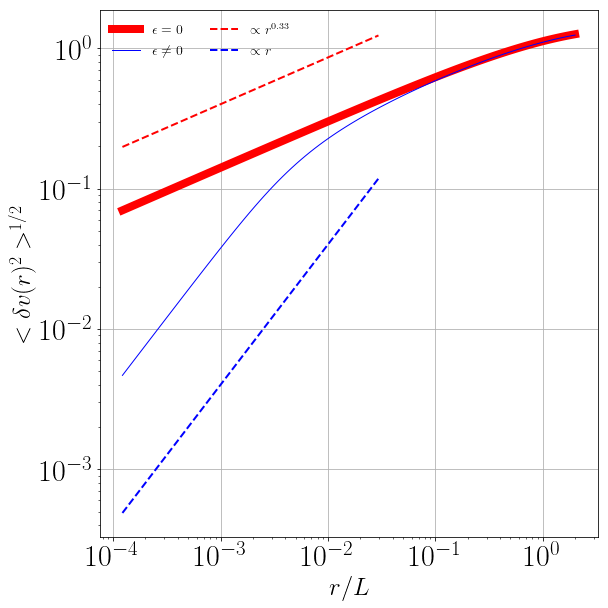

In [5]:
#r=np.linspace(2**(-14),2*pi,2**14)
xi=2/3
r=2**np.linspace(-13,1,100.)

L=1

fig,ax=subplots(1,1,figsize=(1*figheight,figheight),num='smoothing')
epsilon=2*pi/2048
C1=Corr_Kraichnan(xi=xi,epsilon=epsilon,L=L)(r*0)(0)-Corr_Kraichnan(xi=xi,epsilon=epsilon,L=L)(r)(0)
C2=Corr_Kraichnan(xi=xi,epsilon=0,L=L)(r*0)(0)-Corr_Kraichnan(xi=xi,epsilon=0,L=L)(r)(0)

#ax=axs[1]
r0=r[r<pi/100]

ax.plot(r,np.sqrt(2*C2),'r-',label='$\\epsilon = 0$',linewidth=8)    
ax.plot(r,np.sqrt(2*C1),'b',label='$\\epsilon \\neq 0$',linewidth=1)    

ax.plot(r0/L,4*(r0/L)**(0.5*xi),'r--',label='$\propto r^{%0.2f}$' %(xi/2,))
ax.plot(r0/L,4*(r0/L),'b--',label='$\propto r$')

ax.set_ylabel('$<\delta v(r)^2>^{1/2}$')
ax.set_xlabel('$r/L$')

ax.set_xscale('log')
ax.set_yscale('log')
ax.legend(ncol=2)
ax.grid()

fig.savefig('DATA_Kraichnan/Smoothing_delta_%0.2f.png' %(xi,))

### 2) Qualitative behaviour of trajectories for various $\xi$

In [6]:
# Definition of an ensemble of Noisy tracers in a Kraichnan flow in 1D 
class Kraichnan1D:
    def __init__(self, M=2, dt=1e-3, xi=2/3, L=1,epsilon=0, kappa=1e-5, D0=1):
        self.M=M #Number of trajectories
        self.dt=dt #time step for EM integration
        self.xi = xi #roughness
        self.kappa = kappa #Langevin diffusivity
        self.D0 = D0 #Large scale diffusivity
        self.epsilon=epsilon  #epsilon
        self. L=L #L
               
        self.corr =Corr_Kraichnan(xi=self.xi,epsilon=self.epsilon,L=self.L)

        self.DW=np.zeros(self.M)
        self.z=np.zeros(self.M)

        #INIT
        self.t=0
#        self.z=np.random.randn(self.M)*np.sqrt(2*kappa*dt)

    def EulerMaru_step(self,cholesky=True):
        #Compute Kappa(x)
        xy=np.meshgrid(self.z,self.z)
        gamma=self.corr(xy[0])(xy[1])
        if cholesky:
            L=np.linalg.cholesky(gamma)
        else:
            v,a=np.linalg.eigh(gamma, UPLO='L')
            L=a@np.sqrt(np.abs(np.diag(v)))

        U,V=np.random.randn(self.M,1),np.random.randn(self.M)
        DW=(L@U).flatten()  #BM  for Langevin diffusivity
        self.z = self.z + self.D0*DW*np.sqrt(self.dt) + np.sqrt(2*self.kappa*self.dt) * V
        self.t=self.t+self.dt
        return None
    
    def compute_evo(self,NT=100,NB=256,recompute=False,io='DATA_Kraichnan',suffix='',cholesky=True):
        name='trajectories_xi%0.2f_kappa%0.2e_M%0.2d_NT%0.2d%s.npz' %(self.xi,self.kappa,self.M,NT,suffix)
        file=os.path.join(io,name)
        if recompute==False and os.path.exists(file):
            with np.load(file) as data:
#                print('loading trajectories')
                pdfs, bins,time,means=data['pdfs'],data['bins'],data['time'],data['means']
#                print('done')
        else:
            print('Computing trajectories')

            pdfs=np.zeros((NT,NB))
            means=np.zeros((NT,2))
            edges=np.linspace(-5*flow.L,5*flow.L,NB+1)
            bins=(edges[1:]+edges[:-1])*0.5
            time=np.zeros(NT)
            self.t=self.dt
            for i in range(NT):
                if i%100 == 0: print(i)
                time[i]=self.t
                pdf,dummy=np.histogram(self.z,bins=edges,density=True)
                pdfs[i,:]=pdf[:]
                means[i,0]=self.z.mean()
                means[i,1]=(self.z**2).mean()
                
                if i==0:
                    self.EulerMaru_step(cholesky=False)
                else:
                    self.EulerMaru_step(cholesky=cholesky)

                self.t=self.t+self.dt
                
        np.savez(file,pdfs=pdfs,bins=bins,time=time,means=means)
        return pdfs, bins,time,means
    
    def show_scatter(self,pdfs,bins,time,ax=None):
        if ax is None: fig,ax=subplots(1,1,num='new')

        xy=np.meshgrid(bins,time+self.dt)
        im=ax.pcolormesh(xy[0],xy[1],np.log(pdfs)/np.log(10),cmap=cm.gray_r,shading='gouraud')
        ax.set_xticks([-flow.L,0,flow.L])
        ax.set_xticklabels(['-L','0','L'])
        ax.set_xlim(-3*flow.L,3*flow.L)
        ax.set_xlabel('space')
        ax.set_ylabel('time')
        ax.set_title('$\kappa= %0.2e$' %(self.kappa,) )

        cbar = ax.figure.colorbar(im, ax=ax)
        cbar.ax.set_ylabel('$\log p$ ', rotation=-90, va="bottom")
            
        return ax

In [7]:
M=500
NT=2000
NB=256
dt=2e-3
epsilon=0

$\xi=1/3$

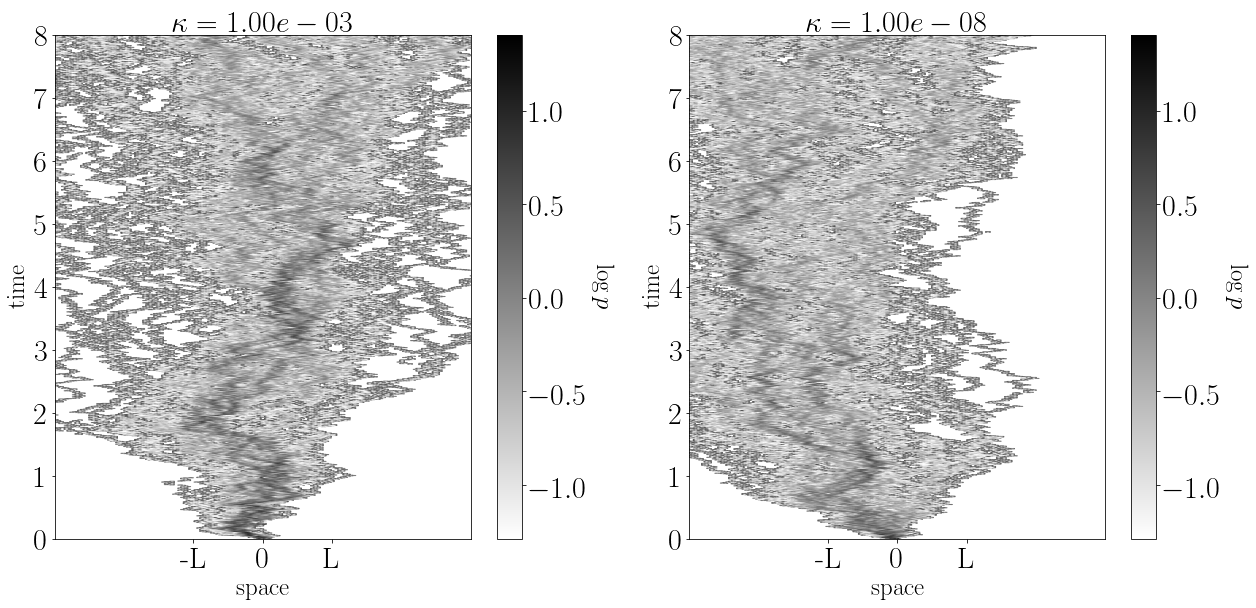

In [8]:
xi=1/3
fig,ax=subplots(1,2,figsize=(2*figheight,figheight),num='$\\xi = %0.2f$' %(xi,))

flow = Kraichnan1D(M=M,dt=dt, xi=xi,L=1,epsilon=epsilon,kappa=1e-3,D0=1) ; flow.z=(np.random.randn(M)-0.5)*0
pdfs,bins,time,means=flow.compute_evo(NT=NT,NB=NB,recompute=False,suffix='_from0')
flow.show_scatter(pdfs,bins,time,ax=ax[0])

flow = Kraichnan1D(M=M,dt=dt, xi=xi,L=1,epsilon=epsilon,kappa=1e-8,D0=1) ; flow.z=(np.random.randn(M)-0.5)*0
pdfs,bins,time,means=flow.compute_evo(NT=NT,NB=NB,recompute=False,suffix='_from0')
flow.show_scatter(pdfs,bins,time,ax=ax[1])

fig.savefig('DATA_Kraichnan/%0.2f_from0.png' %(flow.xi,))

$\xi= 1/3$, log scale

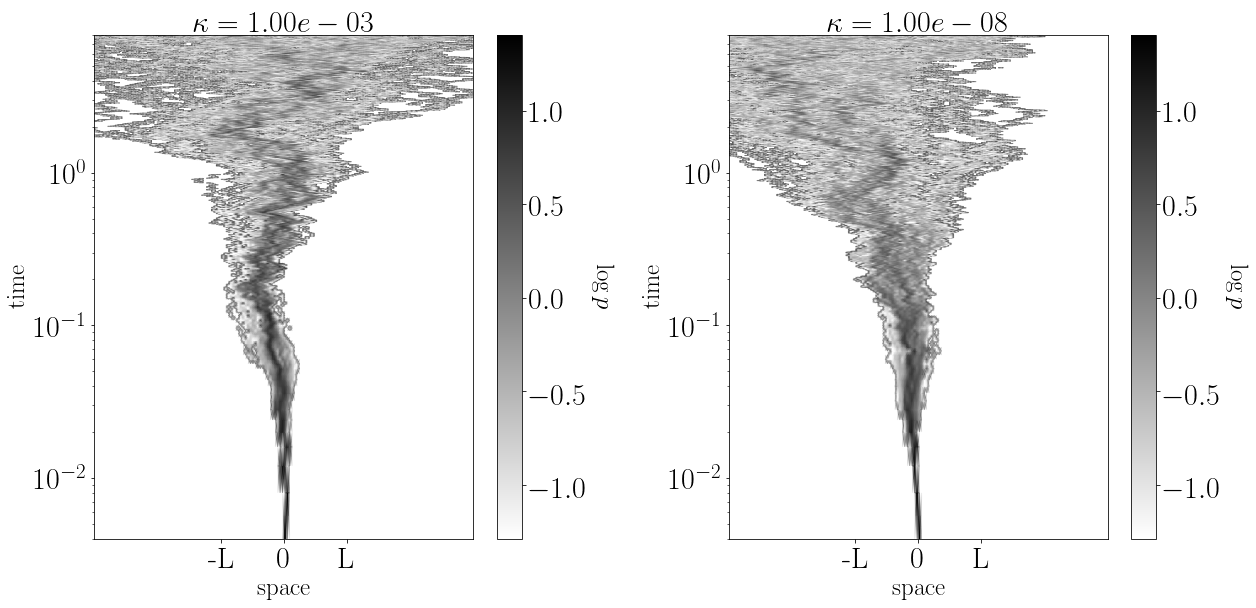

In [18]:
xi=1/3
fig,ax=subplots(1,2,figsize=(2*figheight,figheight),num='$\\xi = %0.2f$' %(xi,))

flow = Kraichnan1D(M=M,dt=dt, xi=xi,L=1,epsilon=epsilon,kappa=1e-3,D0=1) ; flow.z=(np.random.randn(M)-0.5)*0
pdfs,bins,time,means=flow.compute_evo(NT=NT,NB=NB,recompute=False,suffix='_from0')
flow.show_scatter(pdfs,bins,time,ax=ax[0])

flow = Kraichnan1D(M=M,dt=dt, xi=xi,L=1,epsilon=epsilon,kappa=1e-8,D0=1) ; flow.z=(np.random.randn(M)-0.5)*0
pdfs,bins,time,means=flow.compute_evo(NT=NT,NB=NB,recompute=False,suffix='_from0')
flow.show_scatter(pdfs,bins,time,ax=ax[1])

ax[0].set_yscale('log')
ax[1].set_yscale('log')
fig.savefig('DATA_Kraichnan/%0.2f_from0_log.png' %(flow.xi,))

$\xi=2/3$

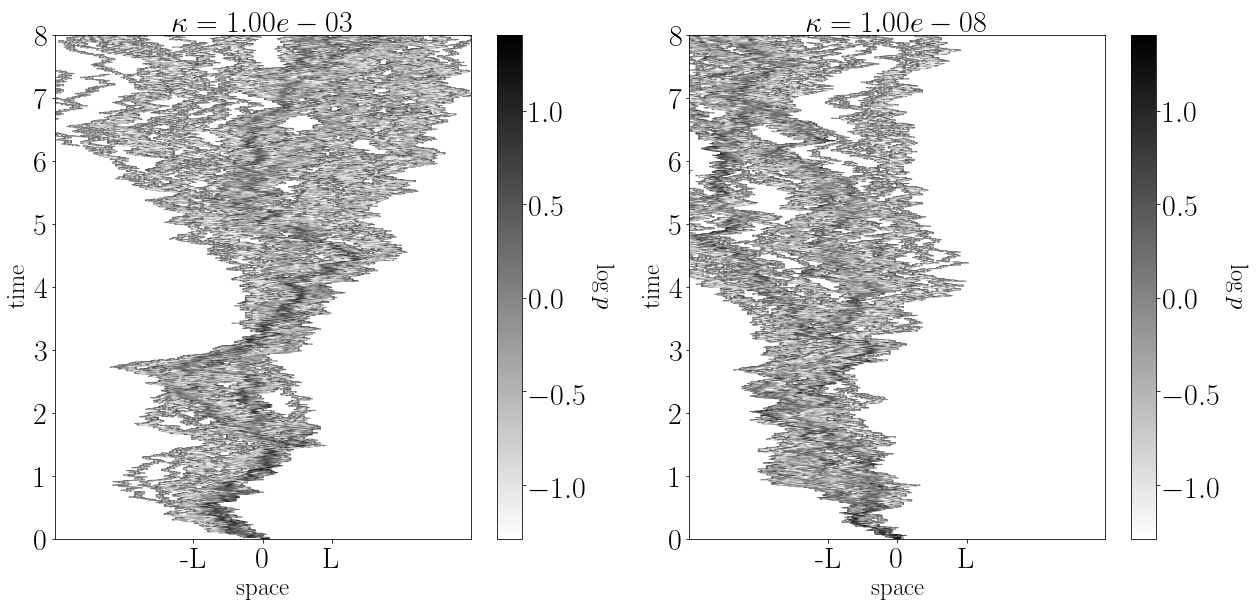

In [9]:
xi=2/3
fig,ax=subplots(1,2,figsize=(2*figheight,figheight),num='$\\xi = %0.2f$' %(xi,))

flow = Kraichnan1D(M=M,dt=dt, xi=xi,L=1,epsilon=epsilon,kappa=1e-3,D0=1) ; flow.z=(np.random.rand(M)-0.5)*0
pdfs,bins,time,means=flow.compute_evo(NT=NT,NB=NB,recompute=False,suffix='_from0')
flow.show_scatter(pdfs,bins,time,ax=ax[0])

flow = Kraichnan1D(M=M,dt=dt, xi=xi,L=1,epsilon=epsilon,kappa=1e-8,D0=1) ; flow.z=(np.random.rand(M)-0.5)*0
pdfs,bins,time,means=flow.compute_evo(NT=NT,NB=NB,recompute=False,suffix='_from0')
flow.show_scatter(pdfs,bins,time,ax=ax[1])

fig.savefig('DATA_Kraichnan/%0.2f_from0.png' %(flow.xi,))

$\xi=1$

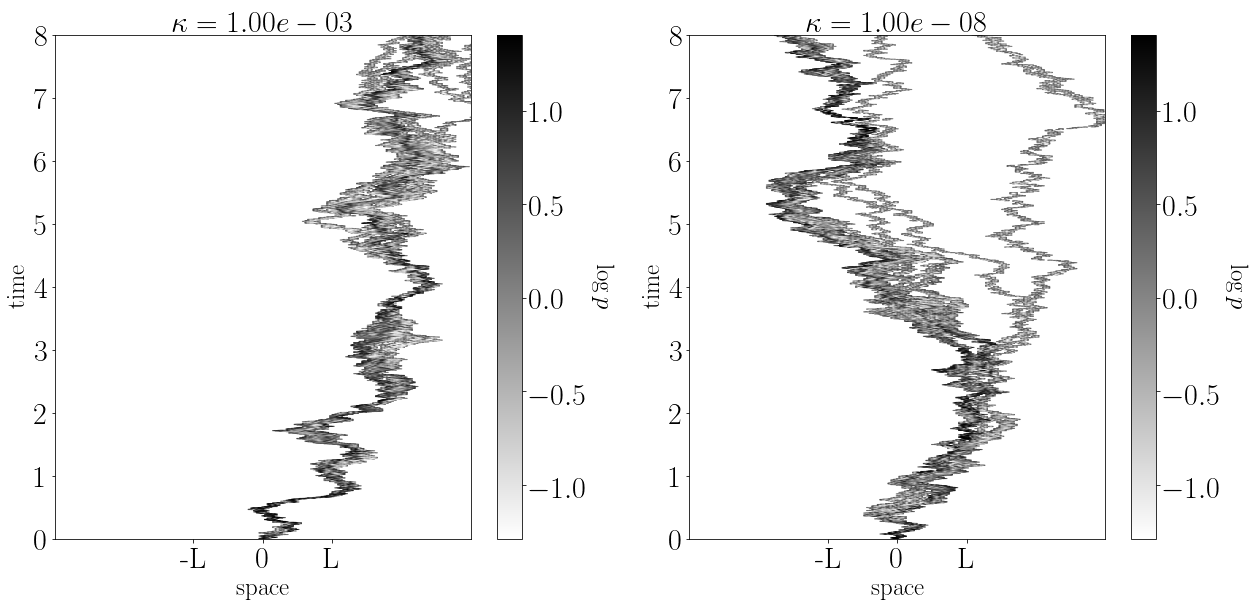

In [10]:
xi=1
fig,ax=subplots(1,2,figsize=(2*figheight,figheight),num='$\\xi = %0.2f$' %(xi,))

flow = Kraichnan1D(M=M,dt=dt, xi=xi,L=1,epsilon=epsilon,kappa=1e-3,D0=1) ; flow.z=(np.random.rand(M)-0.5)*0
pdfs,bins,time,means=flow.compute_evo(NT=NT,NB=NB,cholesky=False,recompute=False,suffix='_from0')
flow.show_scatter(pdfs,bins,time,ax=ax[0])

flow = Kraichnan1D(M=M,dt=dt, xi=xi,L=1,epsilon=epsilon,kappa=1e-8,D0=1) ; flow.z=(np.random.rand(M)-0.5)*0
pdfs,bins,time,means=flow.compute_evo(NT=NT,NB=NB,cholesky=False,recompute=False,suffix='_from0')
flow.show_scatter(pdfs,bins,time,ax=ax[1])

fig.savefig('DATA_Kraichnan/%0.2f_from0.png' %(flow.xi,))

$\xi=4/3$

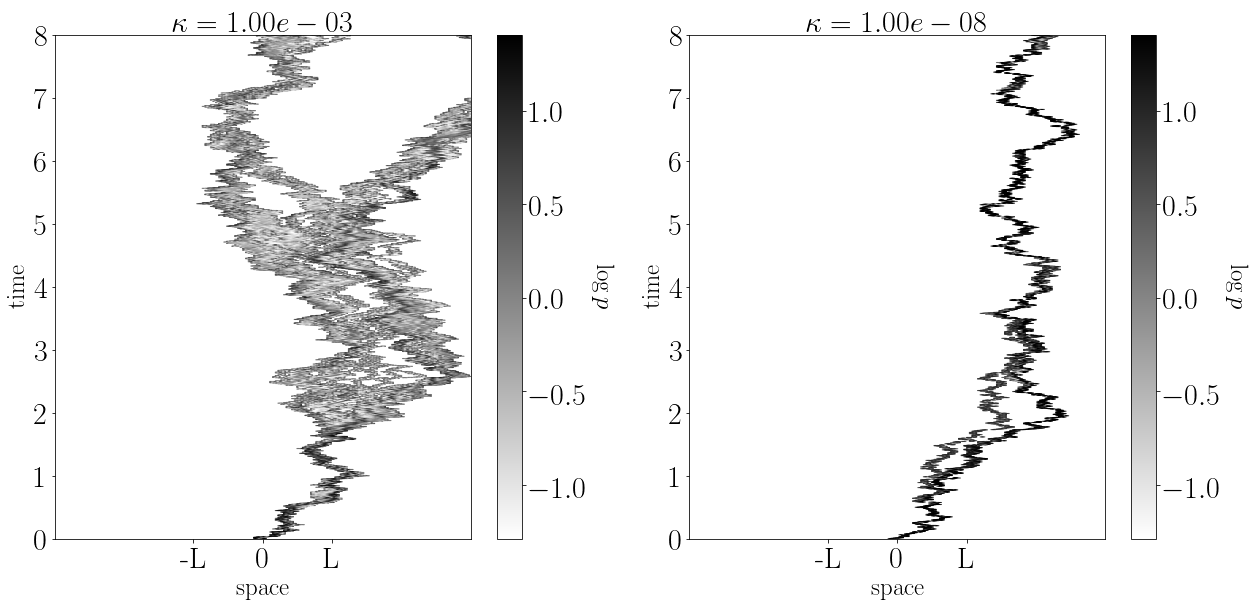

In [11]:
xi=4/3
fig,ax=subplots(1,2,figsize=(2*figheight,figheight),num='$\\xi = %0.2f$' %(xi,))

flow = Kraichnan1D(M=M,dt=dt, xi=xi,L=1,epsilon=epsilon,kappa=1e-3,D0=1) ; flow.z=(np.random.rand(M)-0.5)*0;#np.sqrt(2*flow.kappa*flow.dt)
pdfs,bins,time,means=flow.compute_evo(NT=NT,NB=NB,cholesky=False,recompute=False,suffix='_from0')
flow.show_scatter(pdfs,bins,time,ax=ax[0])

flow = Kraichnan1D(M=M,dt=dt, xi=xi,L=1,epsilon=epsilon,kappa=1e-8,D0=1) ; flow.z=(np.random.rand(M)-0.5)*0;#np.sqrt(2*flow.kappa*flow.dt)
pdfs,bins,time,means=flow.compute_evo(NT=NT,NB=NB,cholesky=False,recompute=False,suffix='_from0')
flow.show_scatter(pdfs,bins,time,ax=ax[1])

fig.savefig('DATA_Kraichnan/%0.2f_from0.png' %(flow.xi,))

$\xi=4/3$

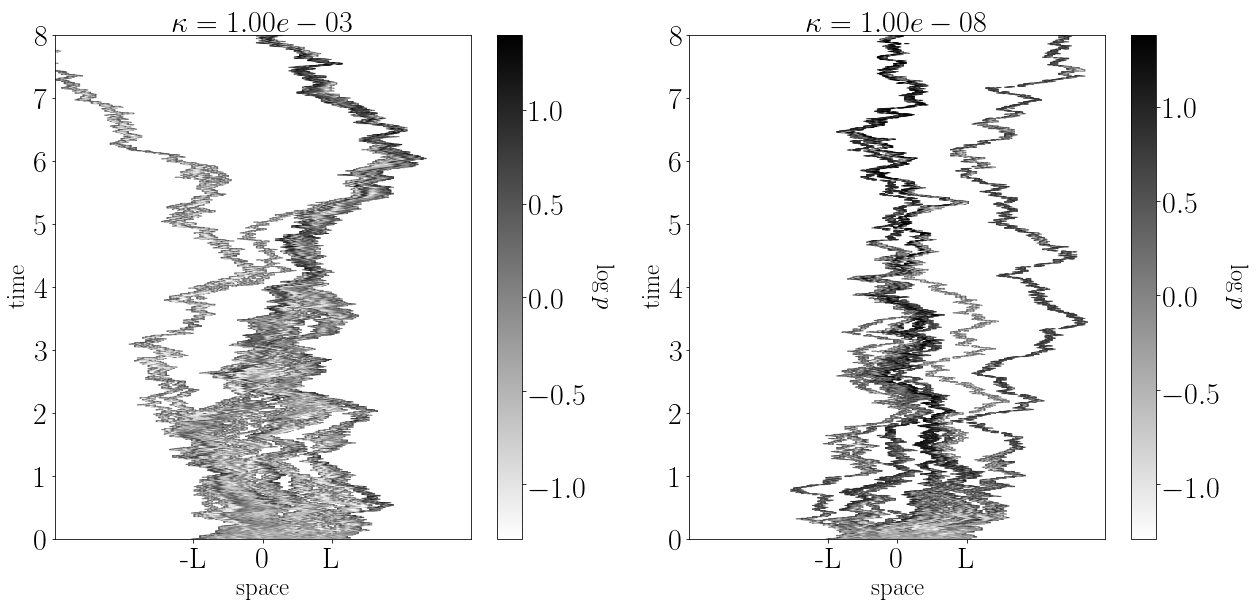

In [12]:
xi=4/3
fig,ax=subplots(1,2,figsize=(2*figheight,figheight),num='$\\xi = %0.2f collapse$' %(xi,))

flow = Kraichnan1D(M=M,dt=dt, xi=xi,L=1,epsilon=epsilon,kappa=1e-3,D0=1) ; flow.z=(np.random.rand(M)-0.5)*flow.L*2
pdfs,bins,time,means=flow.compute_evo(NT=NT,NB=NB,cholesky=False,recompute=False,suffix='_fromL')
flow.show_scatter(pdfs,bins,time,ax=ax[0])

flow = Kraichnan1D(M=M,dt=dt, xi=xi,L=1,epsilon=epsilon,kappa=1e-8,D0=1) ; flow.z=(np.random.rand(M)-0.5)*flow.L*2
pdfs,bins,time,means=flow.compute_evo(NT=NT,NB=NB,cholesky=False,recompute=False,suffix='_fromL')
flow.show_scatter(pdfs,bins,time,ax=ax[1])

fig.savefig('DATA_Kraichnan/%0.2f_fromL.png' %(flow.xi,))

In [13]:
%%html
<style>.container { width:99% !important; }</style>

<script>
  function code_toggle() {
    if (code_shown){
      $('div.input').hide('500');
      $('#toggleButton').val('Show Code')
    } else {
      $('div.input').show('500');
      $('#toggleButton').val('Hide Code')
    }
    code_shown = !code_shown
  }
  $( document ).ready(function(){
    code_shown=false;
    $('div.input').hide()
  });
</script>
<form action="javascript:code_toggle()"><input type="submit" id="toggleButton" value="Show Code"></form>